In [5]:
from epyc import JSONLabNotebook
import epyc
import epydemic
import numpy as np
import pandas as pd
from epydemic import SEIR, SIR, ERNetwork, Monitor, ProcessSequence
import matplotlib.pyplot as plt
from parameters import *

In [6]:
json_lab = JSONLabNotebook(get_out_path("ex_1_seir"), create=False)

In [7]:
dfs = [json_lab.dataframe(tag=rs) for rs in json_lab.resultSets()]
df = pd.concat(dfs)

/tmp/ipykernel_1321684/3014668083.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword argument will take precedence.
  ax1.plot(mean, 'k.', marker="s", label="Ensemble Average",  markersize=3)


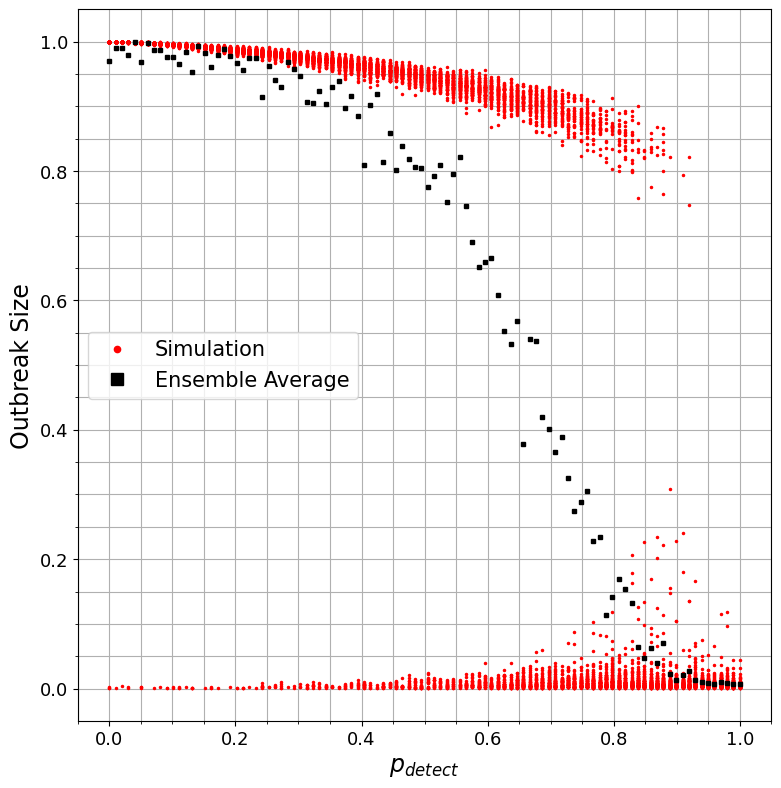

In [8]:
fig, ax1 = plt.subplots(1,  sharex=True, sharey=True, figsize=(8,8))

fig.tight_layout(h_pad=1)

df[SEIR.REMOVED]= df[SEIR.REMOVED] / n

# Calculate mean values from repeated experiments.
mean = df.groupby('pDetect')[SEIR.REMOVED].mean() 

# Plot Raw Data
ax1.plot(df["pDetect"], df[SEIR.REMOVED], 'r.', label="Simulation", markersize=3)


# Plot Mean Data
ax1.plot(mean, 'k.', marker="s", label="Ensemble Average",  markersize=3)


# Set Titles
# fig.suptitle('$p_{rewire}$ = '+f'{p_rewire}, N={n}, kmean={k_mean}', y=1.025)
ax1.set_ylabel('Outbreak Size')
ax1.set_xlabel('$p_{detect}$')


# Set Gridlines
ax1.grid(which = "both")
ax1.minorticks_on()


# Set Legend
ax1.legend(loc="center left")

_ = plt.show()